<a href="https://colab.research.google.com/github/ComplexMan/ising_model_mc/blob/main/1d_ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import exp
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm
from scipy.interpolate import make_interp_spline

In [ ]:
N = 256
mc_step = 3000000
mc_eq = 1500000
Temp = np.linspace(0.01 , 2, 100)

In [ ]:
def calculate_energy(config):
    energy = 0
    N = len(config)
    for i in range(len(config)):
        energy += (-1)*config[i]*config[(i+1)%N]
    return energy

In [ ]:
def monte_carlo(config, temperature, en, mag):
    current_energy = en
    energy = en
    N = len(config)
    spin_flip_number = np.random.randint(len(config))

    S12 = (-1)*config[spin_flip_number]*config[(spin_flip_number+1)%N]
    S23 = (-1)*config[spin_flip_number]*config[(spin_flip_number-1)%N]
    del_E = S12 + S23
    if((del_E >= 0) or (exp(del_E/temperature) >= np.random.uniform(0, 1))):

      if(S12 > 0): energy -= 1
      if(S12 < 0): energy += 1
      if(S23 > 0): energy -= 1
      if(S23 < 0): energy += 1

      config[spin_flip_number] = (-1)*config[spin_flip_number]
      S12 = (-1)*config[spin_flip_number]*config[(spin_flip_number+1)%N]
      S23 = (-1)*config[spin_flip_number]*config[(spin_flip_number-1)%N]
      current_energy = energy + S12 + S23
      mag += 2 * config[spin_flip_number]
       
    return current_energy, mag, config

In [ ]:
def magnetization(config):
    return np.sum(config)

In [ ]:
Energy_tt = np.zeros(len(Temp))
Mag_tt = np.zeros(len(Temp))
C_tt = np.zeros(len(Temp))
X_tt = np.zeros(len(Temp))

for i in tqdm(range(len(Temp))):
    E = 0
    E2 = 0
    M = 0
    M2 = 0
    config = np.random.choice([-1, 1], size=N)
    temp = Temp[i]
    current_energy = calculate_energy(config)
    current_magnetization = magnetization(config)

    for step in range(mc_eq):
        en, mag, config = monte_carlo(config, temp, current_energy, current_magnetization)
        current_energy = en
        current_magnetization = mag
    for step in range(mc_step):
        en, mag, config = monte_carlo(config, temp, current_energy, current_magnetization)
        current_energy = en
        current_magnetization = mag
        E += en
        E2 += en*en
        M += mag
        M2 += mag**2
       
    E /= mc_step
    M /= mc_step
    E2 /= mc_step
    M2 /= mc_step
    beta = 1/temp
    Energy_tt[i] += E/N
    Mag_tt[i] += M/N
    C_tt[i] += ( (beta**2) * (E2 - (E**2)) )/(N)
    X_tt[i] += (  beta * (M2 - (M**2)) )/(N)


100%|██████████| 100/100 [1:46:40<00:00, 64.00s/it]


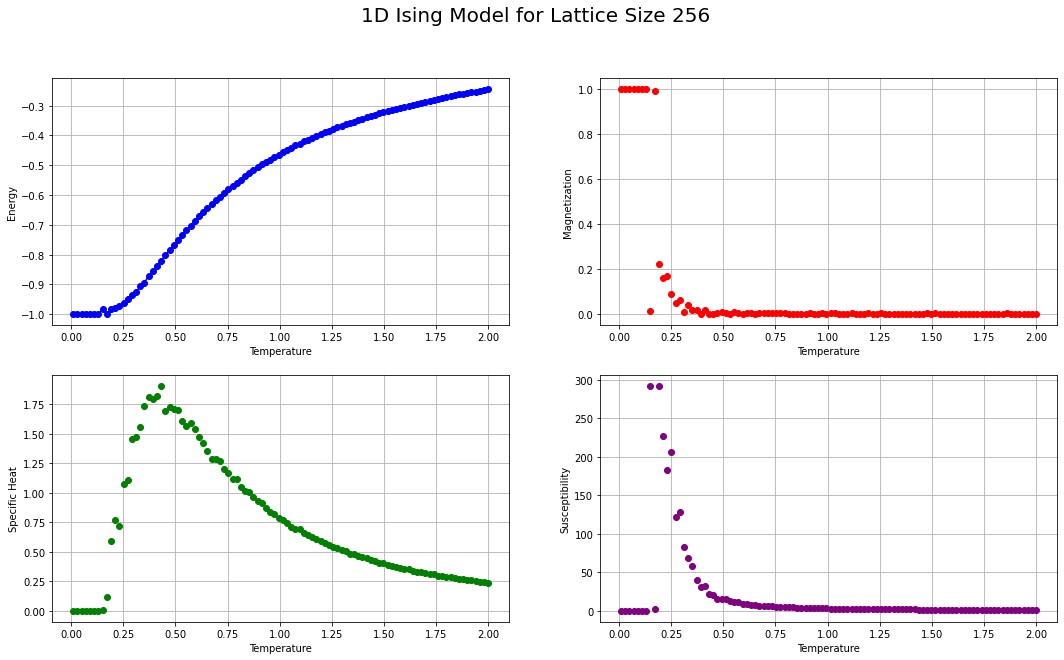

In [ ]:
fig1 = figure(figsize=(18, 10))
fig1.suptitle(f'1D Ising Model for Lattice Size {N} ', fontsize=20)

ax1 = fig1.add_subplot(221)
plt.ylabel("Energy", fontsize=10)
plt.xlabel("Temperature", fontsize=10)
plt.grid()
plt.plot(Temp, Energy_tt, '-o', color='blue')

ax2 = fig1.add_subplot(222)
plt.ylabel("Magnetization", fontsize=10)
plt.xlabel("Temperature", fontsize=10)
plt.grid()
plt.plot(Temp,abs(Mag_tt), 'o', color='red')

ax3 = fig1.add_subplot(223)
plt.ylabel("Specific Heat", fontsize=10)
plt.xlabel("Temperature", fontsize=10)
plt.plot(Temp, C_tt, 'o', color='green')
plt.grid()


ax4 = fig1.add_subplot(224)
plt.ylabel("Susceptibility", fontsize=10)
plt.xlabel("Temperature", fontsize=10)
plt.plot(Temp, X_tt, 'o', color='purple')
plt.grid()